In [4]:
using CSV, Graphs, DataFrames

# Load the CSV file
data = CSV.read(raw"D:\GitHub\AI\graphs\politics\data\politics_prez_vp_only.csv", DataFrame)

Row,name,vice
,String31,String31
1,George Washington,John Adams
2,John Adams,Thomas Jefferson
3,Thomas Jefferson,Aaron Burr
4,James Madison,George Clinton
5,James Monroe,Daniel D. Tompkins
6,John Quincy Adams,John C. Calhoun
7,Andrew Jackson,John C. Calhoun
8,Martin Van Buren,Richard Mentor Johnson
9,William Henry Harrison,John Tyler


In [9]:
# Create an empty graph
g = Graph()

# Create a dictionary to map string labels to integers
nodes_dict = Dict()

# Add nodes for presidents and vice presidents
for i in 1:size(data,1)
    if !haskey(nodes_dict, data[i, :name])
        nodes_dict[data[i, :name]] = length(nodes_dict) + 1
    end
    if !haskey(nodes_dict, data[i, :vice])
        nodes_dict[data[i, :vice]] = length(nodes_dict) + 1
    end
    add_vertex!(g)
end

# Add edges between presidents and vice presidents
for i in 1:size(data,1)
    add_edge!(g, nodes_dict[data[i, :name]], nodes_dict[data[i, :vice]])
end



{46, 28} undirected simple Int64 graph

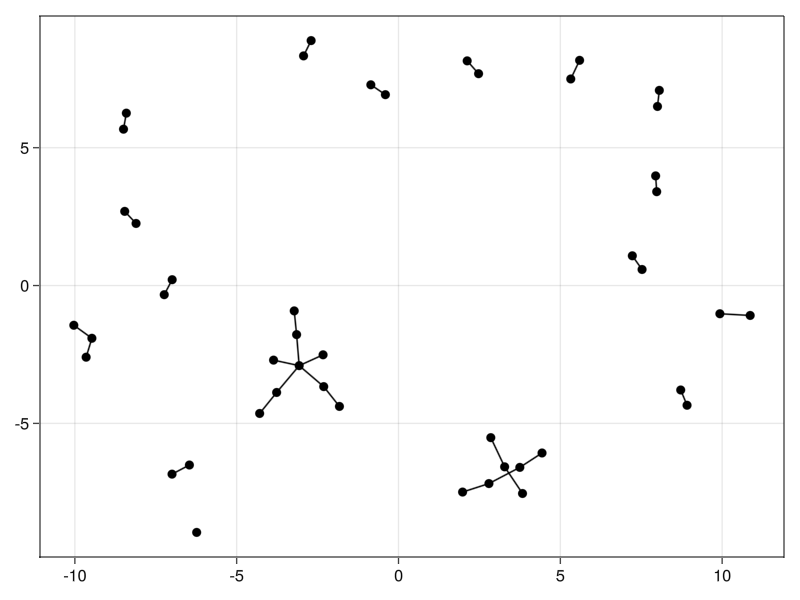

In [12]:
# Display the graph
# using GLMakie
# using GraphMakie
# using Graphs
# display(g)
# graphplot(g)

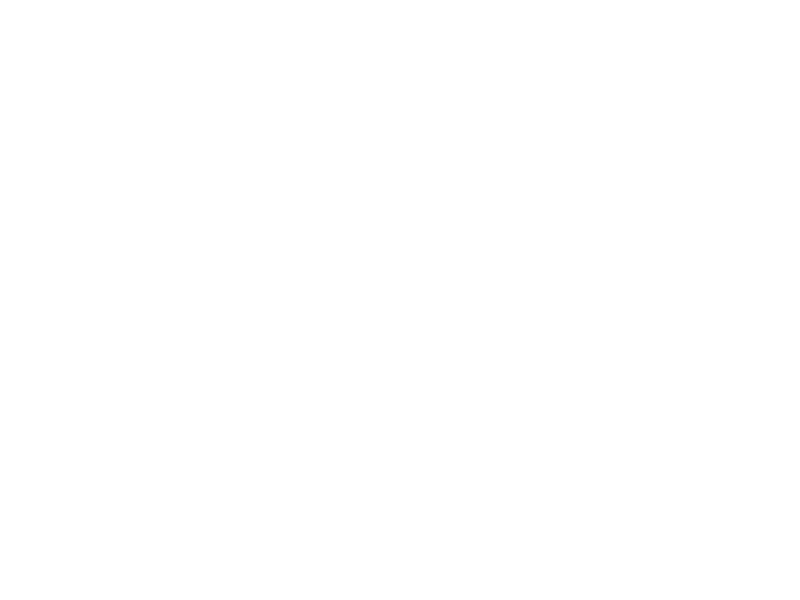

In [35]:
using Makie


# Create a dictionary to map integers to string labels
inv_nodes_dict = Dict(v=>k for (k,v) in nodes_dict)

# Get the number of nodes
nodes_count = Graphs.nv(g)

# Create the graph plot
scene = Scene()



In [36]:
# Add the nodes
for i in 1:nodes_count
    push!(scene, Node(inv_nodes_dict[i], position=circular_layout(nodes_count)[i]))
end

# Add the edges
for edge in edges(g)
    push!(scene, Edge(edge.src, edge.dst))
end

# Show the plot
display(scene)

LoadError: MethodError: no method matching nv(::Int64)
[0mClosest candidates are:
[0m  nv([91m::Graphs.SimpleGraphs.AbstractSimpleGraph{T}[39m) where T at C:\Users\Sean\.julia\packages\Graphs\2JiDT\src\SimpleGraphs\SimpleGraphs.jl:58
[0m  nv([91m::AbstractGraph[39m) at C:\Users\Sean\.julia\packages\Graphs\2JiDT\src\interface.jl:141

In [ ]:
import Pkg; Pkg.add("GLVisualize")

In [27]:
import Pkg; Pkg.add("Makie")

   Resolving package versions...
    Updating `C:\Users\Sean\.julia\environments\v1.6\Project.toml`
  [ee78f7c6] + Makie v0.17.13
  No Changes to `C:\Users\Sean\.julia\environments\v1.6\Manifest.toml`


In [34]:
Graphs.nv(g)


46